<a href="https://colab.research.google.com/github/HussamSelim/CNN-CIFAR10/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Activation,Flatten
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print('X_train shape is {}'.format(x_train.shape))
print('X_test shape is {}'.format(x_test.shape))

X_train shape is (50000, 32, 32, 3)
X_test shape is (10000, 32, 32, 3)


[4]


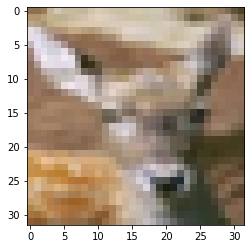

In [4]:
#let's plot one of the images and its corresponding label
plt.imshow(x_train[458])
print(y_train[458])

In [5]:
#perform one hot encoding on the output
import pandas as pd
num_classes=10

y_train=tf.keras.utils.to_categorical(y_train,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)
# y_train=pd.get_dummies(y_train.reshape(-1)).to_numpy()
# y_test=pd.get_dummies(y_test.reshape(-1)).to_numpy()

In [6]:
#let's scale the pixels and make everything float

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

In [7]:

x_train.shape

(50000, 32, 32, 3)

In [10]:
#build a CNN using keras

model1=Sequential()

#adding first layer of 32 5x5 filters with 2x2 stride and padding

model1.add(Conv2D(32,(5,5),(2,2),padding='same', input_shape=x_train.shape[1:]))

model1.add(Activation('relu'))

#adding the second layer of 32 filters 3x3 convolutions

model1.add(Conv2D(32,(5,5),padding='valid', strides = (2,2)))

model1.add(Activation('relu'))

# Adding 2x2 Maxpooling

model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(rate=0.25))

#adding flatten layer to feed it to fully connected layers
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))


model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_7 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [13]:

batch_size=50000

#Intiate Adam Optimizer
opt=tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta"
)
model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

model1.fit(x_train,y_train,
           
           epochs=20,
           validation_data=(x_test,y_test),
           shuffle=True
           )


Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0138 - accuracy: 0.6543 - val_loss: 1.0072 - val_accuracy: 0.6606
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9675 - accuracy: 0.6704 - val_loss: 0.9923 - val_accuracy: 0.6659
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9561 - accuracy: 0.6731 - val_loss: 0.9862 - val_accuracy: 0.6682
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9493 - accuracy: 0.6748 - val_loss: 0.9825 - val_accuracy: 0.6708
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9448 - accuracy: 0.6756 - val_loss: 0.9799 - val_accuracy: 0.6726
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9398 - accuracy: 0.6783 - val_loss: 0.9781 - val_accuracy: 0.6737
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9389 - accuracy: 0.6807 - val_loss: 0.9767 - val_ac